<b><font size="5">Comparision of two Dylos sensors, DC1700 and DC1100, on detection of nanospheres</font></b>

This notebook explores the data produced by Dylos DC1700 and Dylos DC1100 Pro in a box with different sized nanospheres.

In [1]:
%matplotlib inline
import sys
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import logging
logging.basicConfig()
logger = logging.getLogger('ulmo.usgs.nwis.core')
logger.setLevel(logging.WARNING)

Define functions

In [2]:
def loadData(path, columns):
    if os.path.exists(path):
        cols = ['DateTime'] + columns
        df = pd.read_csv(path,
                         parse_dates={"Datetime" : [0]},
                         index_col='Datetime',
                         infer_datetime_format=True,
                         header=None,
                         names=cols
                        )
        return df
    else:
        print(path + " does not exists")
              
def realCounts(data):
    """Subtract the upper bins from the lower bins
    """
    # Get number of columns, loop over, sum upper and subtract from lower.
    columns = data.columns
    for i in range(0, len(columns)):
        sumup = data[columns[(i+1):]].sum(axis=1)
        data[columns[i]] = data[columns[i]] - sumup
    return data
              
def plot(df, df1, path):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df.plot(ax=ax)
    df1.plot(ax=ax)
    plt.ylabel('Particle count')
    plt.xlabel('Time')
    # custom_tick_labels = data.index.map(lambda t: t.strftime('%H'))
    # ax.set_xticklabels(custom_tick_labels)

    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper center', mode='expand')
    art = []
    lgd = ax.legend(lines, labels, loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
    art.append(lgd)
    kwargs = {"additional_artists": art,
              "bbox_inches": "tight"}

    plt.tight_layout()
    path1 = os.path.join(path, "dylos-twoplot.png")
    fig.savefig(path1)
    path2 = os.path.join(path, "dylos-twoplot.pgf")
    fig.savefig(path2, **kwargs)

Set directories to find data and to store output figures:

In [3]:
# Name of directory to find data and store plots
name = "dylos-grimm"

# Current directory
cwd = os.getcwd()

# Base project directory
project_dir = os.path.join(cwd, os.pardir)
project_dir = os.path.abspath(project_dir)

# Where is the raw data directory
data_dir = os.path.join(project_dir, "data", "raw", name)

# Store plots in this drectory
imgs_dir = os.path.join(project_dir, "imgs", name)
if not os.path.isdir(imgs_dir):
    os.makedirs(imgs_dir)

## Particle sizes

The particles of different sizes were introduced into the box at different times.
The below dictionary list the times in the dataset corresponding to the time the particles of a particular size was introduced into the box and the times when the particles were removed from the box.

In [4]:
conditions = {"full": ["2016-07-04 7:00:00", "2016-07-05 15:00:00"],
              "0.4": ["2016-07-04 08:30:00", "2016-07-04 08:50:00"],
              "0.3": ["2016-07-04 09:30:00", "2016-07-04 10:00:00"],
              "2": ["2016-07-04 10:20:00", "2016-07-04 10:55:00"],
              "1": ["2016-07-04 13:45:00", "2016-07-04 14:45:00"],
              "0.8": ["2016-07-05 09:45:00", "2016-07-05 10:15:00"],
              "0.2": ["2016-07-05 12:00:00", "2016-07-05 12:45:00"]
             }

## Data loading and processing

In [5]:
# Path to datasets
path = os.path.join(data_dir, "dylos1.log")
path1 = os.path.join(data_dir, "dylos2.log")

# Dylos DC1700
columns=['0.5-Dylos', '2.5-Dylos']
df = loadData(path, columns)
df.index = df.index.values.astype('<M8[m]')
df = realCounts(df)              

# Dylos DC1100 Pro
columns=['0.5-Dylos1', '2.5-Dylos1']
df1 = loadData(path1, columns)
df1.index = df1.index.values.astype('<M8[m]')
df1 = realCounts(df1)

### 0.2

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\andre\\projects\\aerosol\\imgs\\dylos-grimm\\0.2\\dylos-twoplot.png'

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


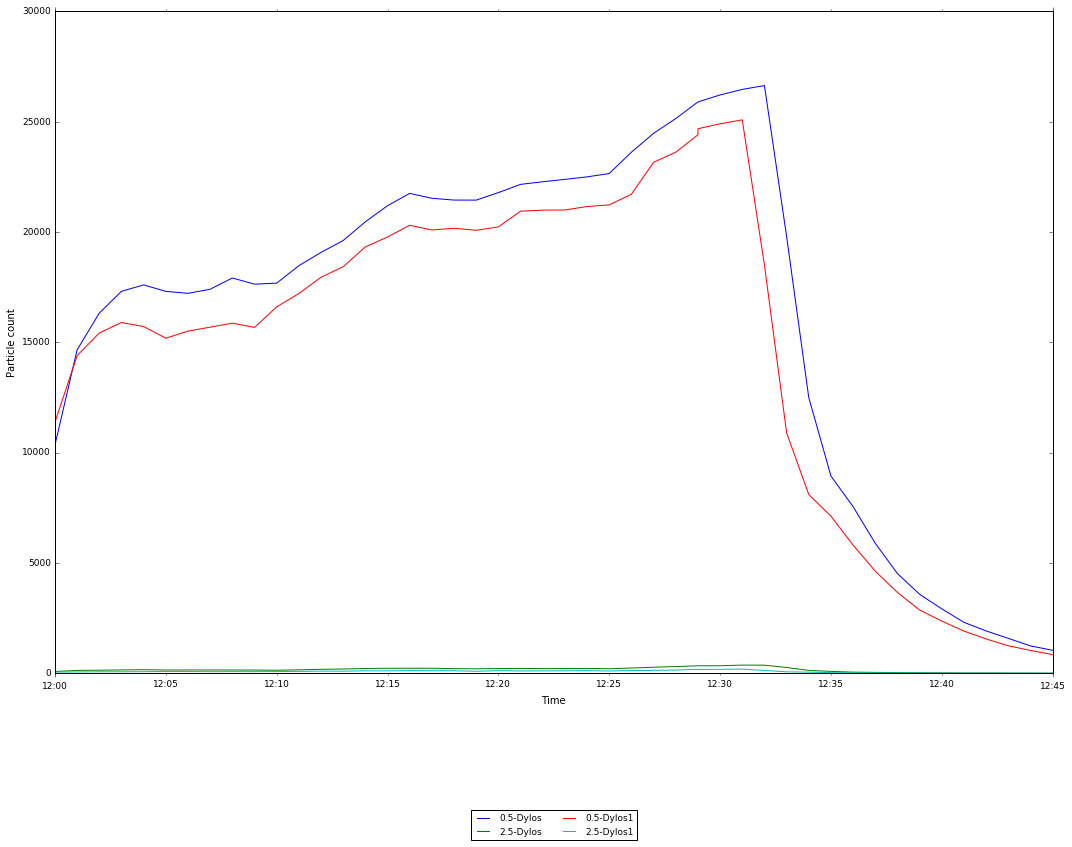

In [6]:
exp = "0.2"

start = conditions[exp][0]
end = conditions[exp][1]
imgs_path = os.path.join(imgs_dir, exp)
if not os.path.isdir(imgs_path):
    os.makedirs(imgs_path)
plot(df.loc[start:end], df1.loc[start:end], imgs_path)